In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload

In [2]:
import numpy as np
import astropy.units as units
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.sparse as sparse
import copy

In [3]:
%autoreload 2
import dualpy as dp

In [4]:
t_in = np.arange(1000) * units.s
t_max = t_in[-1] + 1 * units.s

In [5]:
omega = 2 * np.pi * (20.0/t_max) * units.rad
t0 = t_max/2
w = t_max/4
omega = dp.seed(omega, "omega")
t0 = dp.seed(t0, "t0")
w = dp.seed(w, "w")
# t_in = dp.seed(t_in, "t_in")

In [6]:
def f(t):
    return np.cos(omega*t) * np.exp(-((t-t0)/(w/4))**2)

In [7]:
x_in = f(t_in)
x_in = dp.seed(x_in, "x_in", force=True)

In [8]:
t_out = t_in[:-1] + np.random.rand(t_in.size - 1) * units.s
x_out_true = f(t_out)

In [9]:
interpolator = dp.CubicSpline(t_in, x_in)
x_out_spline = interpolator(t_out)

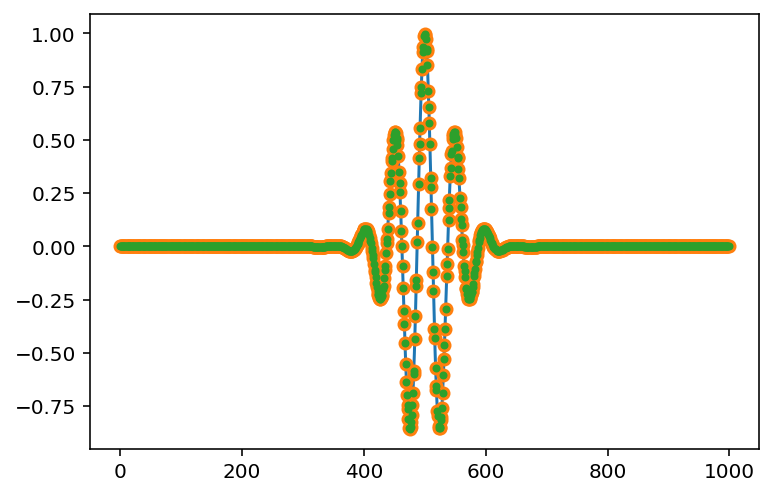

In [10]:
plt.plot(t_in, x_in)
plt.plot(t_out, x_out_true, 'o')
plt.plot(t_out, x_out_spline, '.')

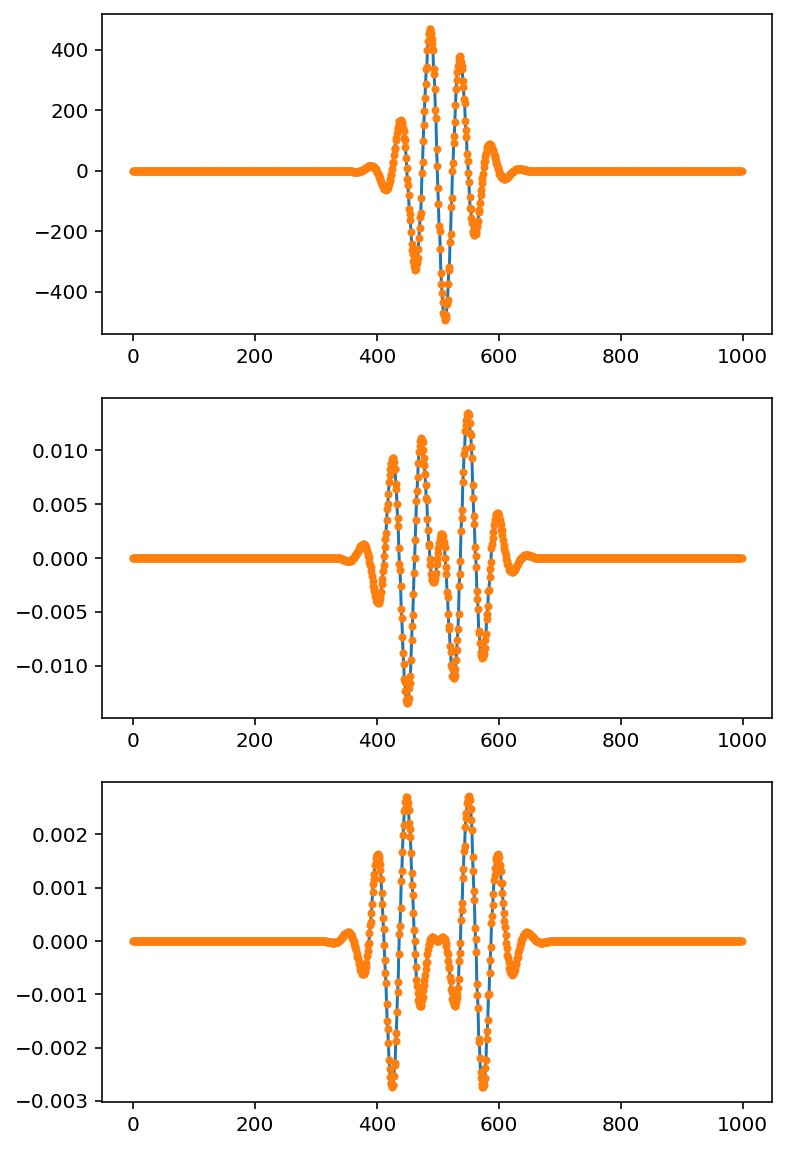

In [11]:
terms = x_out_true.jacobians.keys()
fig, ax = plt.subplots(len(terms), figsize=[6,10])
for i, key in enumerate(terms):
    ax[i].plot(x_out_true.jacobians[key].todensearray())
    ax[i].plot(x_out_spline.jacobians[key].todensearray(), '.')